In [35]:
import cv2
import numpy as np

# load image
img = cv2.imread("C:/Users/jasmine/Desktop/2.jpg")

#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold 
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# get external contour
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
big_contour = max(contours, key=cv2.contourArea)

# draw white filled contour on black background as mask
mask = np.zeros_like(thresh, dtype=np.uint8)
cv2.drawContours(mask, [big_contour], 0, 255, -1)

# get bounds of contour
x,y,w,h = cv2.boundingRect(big_contour)

# crop image and mask
img_crop = img[y:y+h, x:x+w]
mask_crop = mask[y:y+h, x:x+w]

# put mask in alpha channel of image
result = cv2.cvtColor(img_crop, cv2.COLOR_BGR2BGRA)
result[:,:,3] = mask_crop

# save resulting masked image
cv2.imwrite('mri_thresh.png', thresh)
cv2.imwrite('mri_cropped.png', img_crop)
cv2.imwrite('mri_cropped_alpha.png', result)

# ALTERNATE ERODE mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
thresh2 = cv2.morphologyEx(mask, cv2.MORPH_ERODE, kernel)

# get external contour
contours2 = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2 = contours2[0] if len(contours2) == 2 else contours2[1]
big_contour2 = max(contours2, key=cv2.contourArea)

# draw white filled contour on black background as mask
mask2 = np.zeros_like(thresh2, dtype=np.uint8)
cv2.drawContours(mask2, [big_contour2], 0, 255, -1)

# get bounds of contour
x,y,w,h = cv2.boundingRect(big_contour2)

# crop image and mask
img_crop2 = img[y:y+h, x:x+w]
mask_crop2 = mask2[y:y+h, x:x+w]

# put mask in alpha channel of image
result2 = cv2.cvtColor(img_crop2, cv2.COLOR_BGR2BGRA)
result2[:,:,3] = mask_crop2

# save results
cv2.imwrite("mri_thresh.png", thresh)
cv2.imwrite("mri_cropped.png", img_crop)
cv2.imwrite("mri_cropped_alpha.png", result)
cv2.imwrite("mri_thresh2.png", thresh2)
cv2.imwrite("mri_cropped2.png", img_crop2)
cv2.imwrite("mri_cropped_alpha2.png", result2)

# display result
cv2.imshow("thresh", thresh)
cv2.imshow("mask", mask)
cv2.imshow("result", result)
cv2.imshow("thresh2", thresh2)
cv2.imshow("mask2", mask2)
cv2.imshow("result2", result2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [101]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
from sklearn.preprocessing import MinMaxScaler #to scale image pixels
import pandas as pd
from skimage.filters import gaussian
import cv2
from scipy.signal import convolve2d
from skimage import io, img_as_float
from skimage.segmentation import active_contour
scaler = MinMaxScaler()

DATASET_PATH = "C:/Users/jasmine/Desktop/graduation project/data/"

#load single image as numpy array
test_image_AD=nib.load( DATASET_PATH+ "AD_T2/ADNI/002_S_0619/Axial_PD_T2_FSE/2006-06-01_20_16_38.0/S15207/ADNI_002_S_0619_MR_Axial_PD_T2_FSE__br_raw_20060605133200599_2_S15207_I16498.nii").get_fdata()   # fdata Extract data as numpy ndarray


Ii=test_image_AD [:, :, 20,0]
Ii.shape
Ii.max()

4705.0

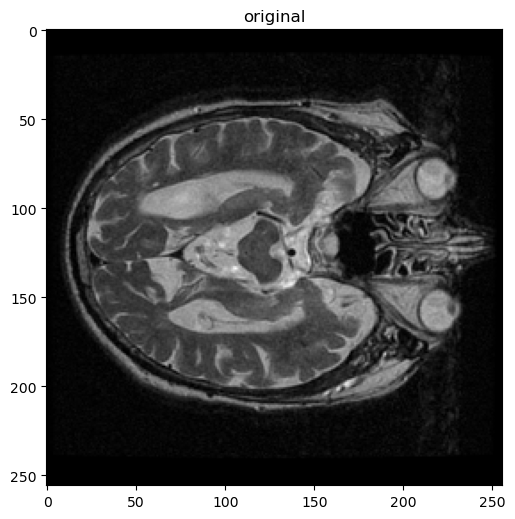

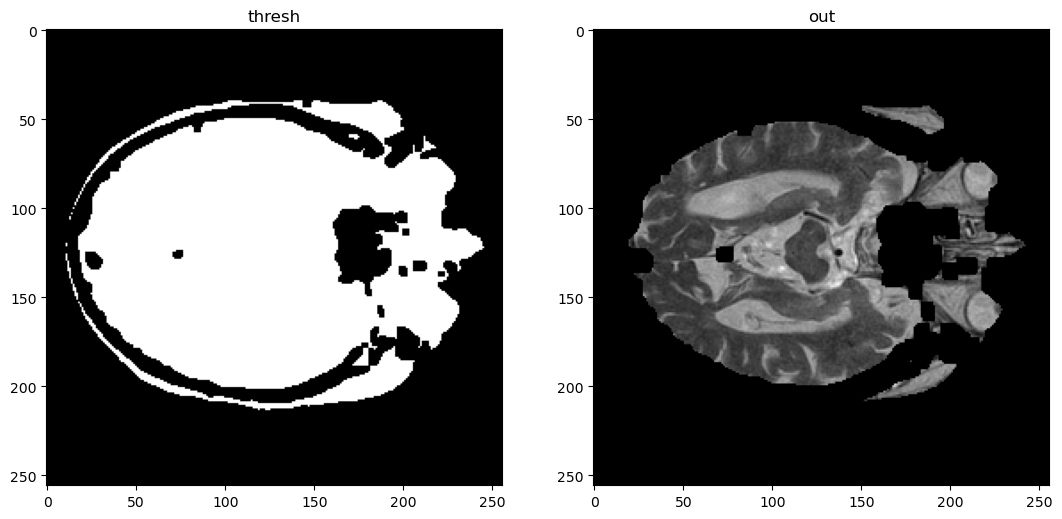

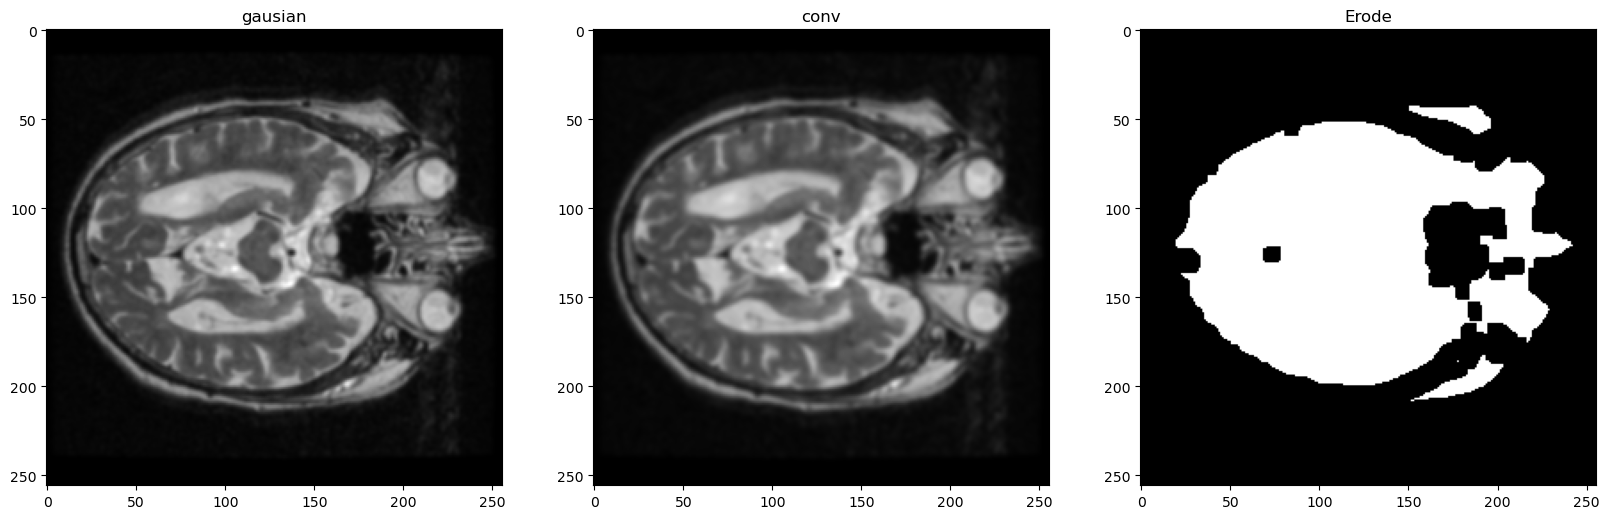

3751.5773406781295


In [124]:
##### here threshold doesnot work ####

import cv2
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from scipy.signal import convolve2d

kernel = np.ones((3,3),np.float32)/9 
#I = cv2.imread("C:/Users/jasmine/Desktop/3.jpg")


#gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

I1= gaussian(Ii)
I2 = cv2.filter2D(I1, -1, kernel, borderType=cv2.BORDER_CONSTANT)
I3=cv2.erode(I2,kernel,iterations=1)
image = I3.astype(np.uint16)

thresh = cv2.threshold(image, 254, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1]
I3=cv2.erode(thresh,kernel,iterations=2)


#I4=active_contour
I5=Ii*I3
#(thresh, im_bw) = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)








plt.figure(figsize=(20, 20))
plt.subplot(231)
plt.imshow(Ii, cmap='gray')
plt.title('original')
plt.figure(figsize=(20, 20))
plt.subplot(232)
plt.imshow(thresh, cmap='gray')
plt.title('thresh')

plt.subplot(233)
plt.imshow(I5, cmap='gray')
plt.title('out')

'''plt.subplot(232)
plt.imshow(gray, cmap='gray')
plt.title('gray level')
plt.subplot(233)
plt.imshow(thresh, cmap='gray')
plt.title('threshold')'''
plt.show()

plt.figure(figsize=(20, 20))
plt.subplot(231)
plt.imshow(I1, cmap='gray')
plt.title('gausian')
plt.subplot(232)
plt.imshow(I2, cmap='gray')
plt.title('conv')
plt.subplot(233)
plt.imshow(I3, cmap='gray')
plt.title('Erode')
plt.show()
'''
plt.figure(figsize=(20, 20))
plt.subplot(231)
plt.imshow(I4, cmap='gray')
plt.title('contour')
plt.subplot(232)
plt.imshow(I5, cmap='gray')
plt.title('result')
plt.show()
'''
#im_gray = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
mm=np.max(I2)
print(mm)


In [13]:
plt.imsave("C:/Users/jasmine/Desktop/3.jpg",img,cmap='gray')




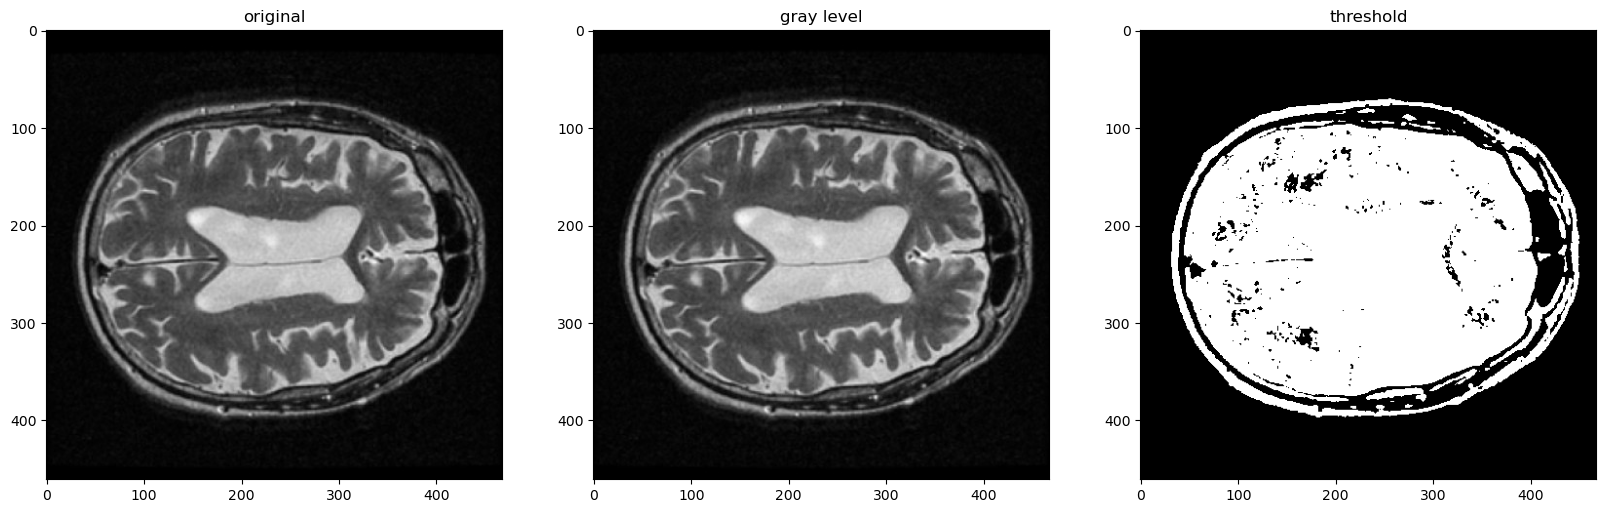

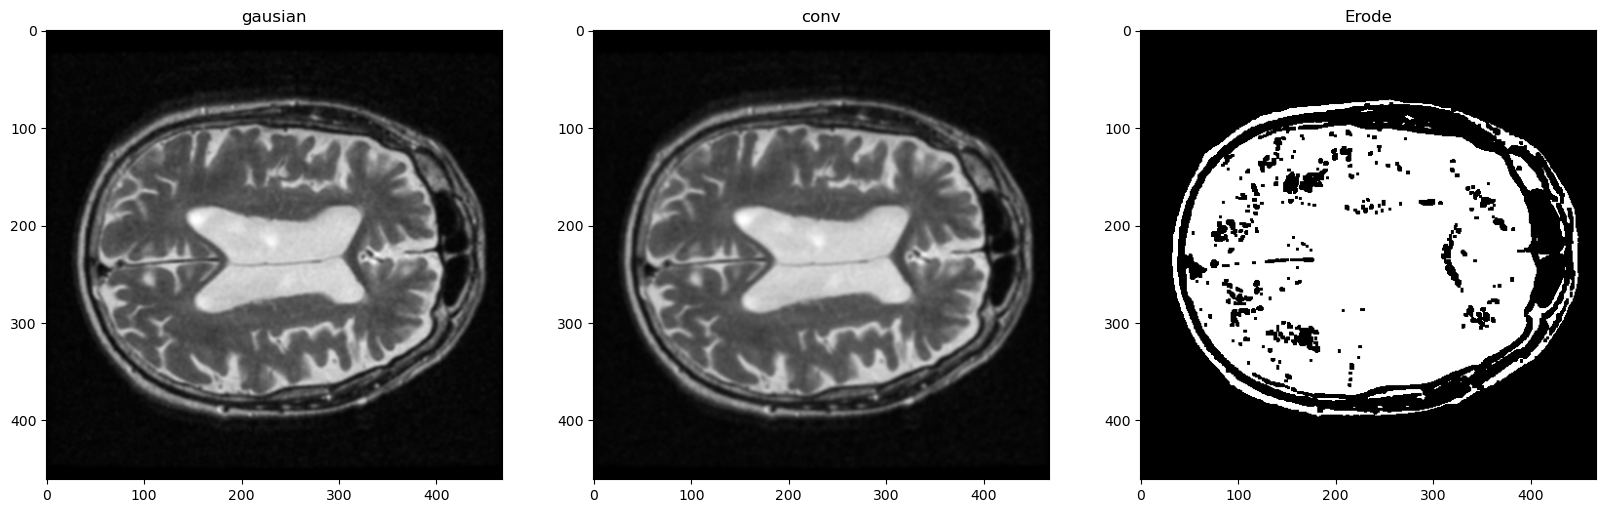

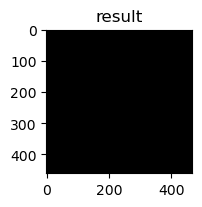

"\nplt.figure(figsize=(20, 20))\nplt.subplot(231)\nplt.imshow(I4, cmap='gray')\nplt.title('contour')\nplt.subplot(232)\nplt.imshow(I5, cmap='gray')\nplt.title('result')\nplt.show()\n"

In [86]:
import cv2
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from scipy.signal import convolve2d

kernel = np.ones((3,3),np.float32)/9 

I = cv2.imread("C:/Users/jasmine/Desktop/1.jpg")

gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

I1= gaussian(gray)
I2 = cv2.filter2D(I1, -1, kernel, borderType=cv2.BORDER_CONSTANT)
image = I2.astype(np.uint8)

thresh = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1]   ### work on gray only

I3=cv2.erode(thresh,kernel)




#I4=active_contour
#I5=I*I4
#(thresh, im_bw) = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)


#image = I.astype("uint8")





plt.figure(figsize=(20, 20))
plt.subplot(231)
plt.imshow(I, cmap='gray')
plt.title('original')
plt.subplot(232)
plt.imshow(gray, cmap='gray')
plt.title('gray level')
plt.subplot(233)
plt.imshow(thresh, cmap='gray')
plt.title('threshold')
plt.show()

plt.figure(figsize=(20, 20))
plt.subplot(231)
plt.imshow(I1, cmap='gray')
plt.title('gausian')
plt.subplot(232)
plt.imshow(I2, cmap='gray')
plt.title('conv')
plt.subplot(233)
plt.imshow(I3, cmap='gray')
plt.title('Erode')
plt.show()

plt.subplot(232)
plt.imshow(image, cmap='gray')
plt.title('result')
plt.show()
'''
plt.figure(figsize=(20, 20))
plt.subplot(231)
plt.imshow(I4, cmap='gray')
plt.title('contour')
plt.subplot(232)
plt.imshow(I5, cmap='gray')
plt.title('result')
plt.show()
'''
#im_gray = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)

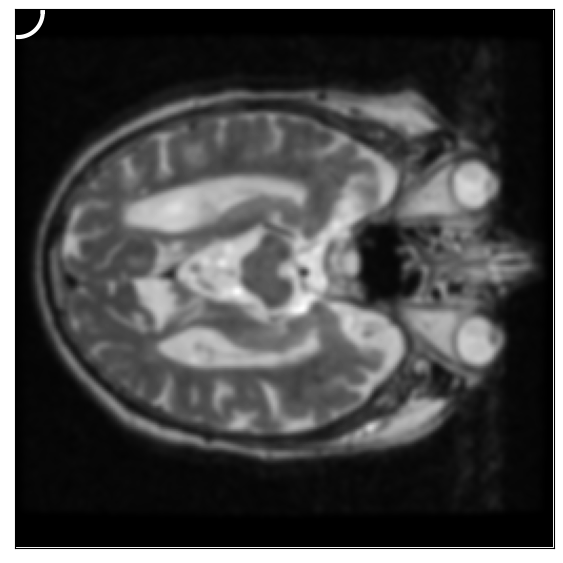

array([ 0.00000000e+00,  3.15685498e-02,  6.31056313e-02,  9.45798078e-02,
        1.25959705e-01,  1.57214043e-01,  1.88311666e-01,  2.19221577e-01,
        2.49912962e-01,  2.80355229e-01,  3.10518032e-01,  3.40371303e-01,
        3.69885285e-01,  3.99030558e-01,  4.27778068e-01,  4.56099159e-01,
        4.83965601e-01,  5.11349616e-01,  5.38223906e-01,  5.64561683e-01,
        5.90336692e-01,  6.15523241e-01,  6.40096223e-01,  6.64031143e-01,
        6.87304143e-01,  7.09892022e-01,  7.31772266e-01,  7.52923064e-01,
        7.73323331e-01,  7.92952733e-01,  8.11791702e-01,  8.29821460e-01,
        8.47024034e-01,  8.63382275e-01,  8.78879879e-01,  8.93501396e-01,
        9.07232251e-01,  9.20058757e-01,  9.31968129e-01,  9.42948495e-01,
        9.52988909e-01,  9.62079363e-01,  9.70210796e-01,  9.77375101e-01,
        9.83565137e-01,  9.88774735e-01,  9.92998700e-01,  9.96232822e-01,
        9.98473878e-01,  9.99719634e-01,  9.99968847e-01,  9.99221269e-01,
        9.97477646e-01,  

In [115]:
s = np.linspace(0, 2*np.pi, 200)
r = image.shape[0]*np.sin(s)
c = image.shape[1]*np.cos(s)
init = np.array([r, c]).T
snake = active_contour(I3,init, alpha=0.0015, beta=10, gamma=0.002)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(snake[:, 1], snake[:, 0], '-w', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image.shape[1], image.shape[0], 0])
plt.show()
np.sin(s)